
# **Data Visualization**
### Objectives
- Read the cleaned data and visualize it in order to understand trends, correlations, and to understand which variables influence *insurance charges*.
### Inputs
- The file uses `insurance_cleaned.csv` text file located in the `data\cleaned` folder.
### Outputs
- This notebook generates various plots and relies on `matplotlib`, `seaborn` and `plotly` to generate them.

## Load the libraries and the data
In this section the relevant data analysis libraries and the raw data will be loaded.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')

THe data will be loaded as the variable `insurance`:

In [2]:
insurance = pd.read_csv("../data/cleaned/insurance_cleaned.csv")
print(insurance.shape)
insurance.head()

(1338, 9)


,age,sex,bmi,children,smoker,region,charges,age_bracket,bmi_category
0,19,female,27.900,0,True,southwest,16884.92400,18-25,overweight
1,18,male,33.770,1,False,southeast,1725.55230,18-25,obesity
2,28,male,33.000,3,False,southeast,4449.46200,26-35,obesity
3,33,male,22.705,0,False,northwest,21984.47061,26-35,normal
4,32,male,28.880,0,False,northwest,3866.85520,26-35,overweight


## Overview of charges distribution
This section will provide a brief overview of insurance charges distribution.

In [3]:
insurance['charges'].describe().round(1)

count     1338.0
mean     13270.4
std      12110.0
min       1121.9
25%       4740.3
50%       9382.0
75%      16639.9
max      63770.4
Name: charges, dtype: float64

The distribution will be easier to visualize when presented as a box plot and a swarm plot:

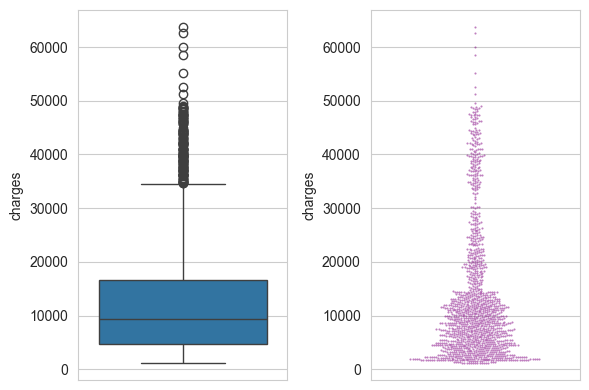

In [4]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6, 4))
sns.boxplot(y='charges', data=insurance, ax=ax[0])
sns.swarmplot(y='charges', data=insurance, ax=ax[1], color='purple', alpha=0.5, size=1.5)
plt.tight_layout()
plt.show()

As you can see most of the data is clustered towards the bottom, with a significant number of outliers. These outliers will be crucial to understand the data as their presence is likely predicated on the presence of other variables.

Next we will take a closer look at the price distribution with the kde plot overlaid over the histogram:

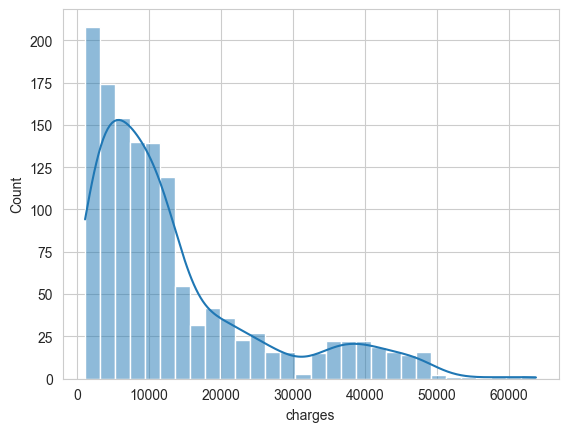

In [5]:
sns.histplot(data=insurance, x='charges', kde=True)
plt.show()

Here we can see that the data shows a kind of mix between right skewed and bimodal data, with the second mode having fewer people. As expected most of the prices are concentrated towards the lower end of the spectrum.

## Categorical data and insurance charges
Here we will look at insurance charges per each category.

### Smoker status and sex
First we will look for these two simple binary variables to see how they compare. Let's look at average charges per category.

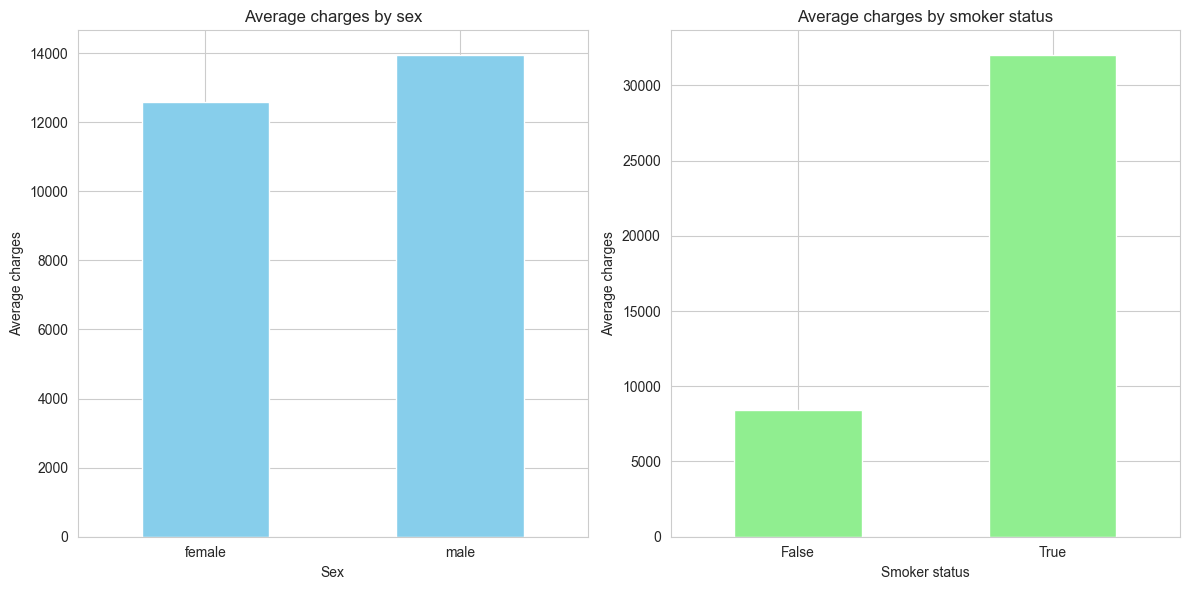

In [6]:
# Calculate average charges by sex
avg_charges_by_sex = insurance.groupby('sex')['charges'].mean()

# Calculate average charges by smoker status
avg_charges_by_smoker = insurance.groupby('smoker')['charges'].mean()

# Create a single figure for both bar plots
plt.figure(figsize=(12, 6))

# Bar plot for average charges by sex
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
avg_charges_by_sex.plot(kind='bar', color='skyblue')
plt.title('Average charges by sex')
plt.xlabel('Sex')
plt.ylabel('Average charges')
plt.xticks(rotation=0)

# Bar plot for average charges by smoker status
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
avg_charges_by_smoker.plot(kind='bar', color='lightgreen')
plt.title('Average charges by smoker status')
plt.xlabel('Smoker status')
plt.ylabel('Average charges')
plt.xticks(rotation=0)

# Display the plots
plt.tight_layout()
plt.show()

Then let's look at the distribution:

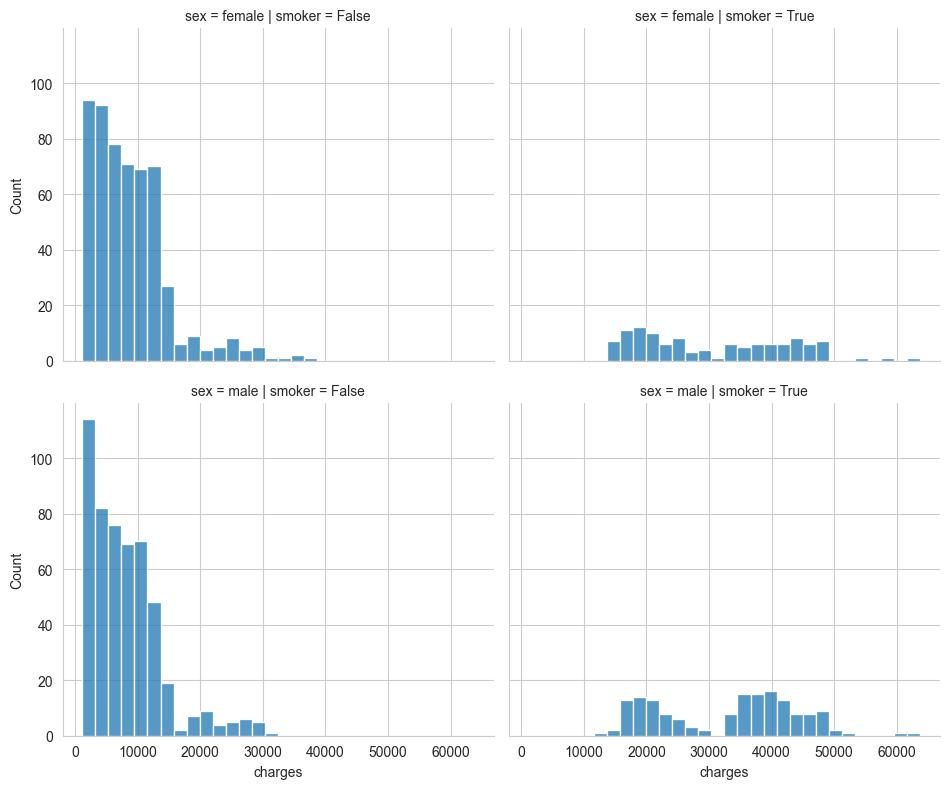

In [7]:
sns.displot(insurance, x='charges', col='smoker', row='sex', height=4, aspect=1.2)
plt.show()

Here we see similar distribution between the two sexes present in the data, but smoker status significantly alter the distribution. The higher average charges for people labeled male in the data can probably be explained by other factors such as the fact that larger number of people assigned this label are smokers:

In [8]:
insurance.groupby(['sex', 'smoker']).size().unstack(fill_value=0)

smoker,False,True
sex,,
female,547,115
male,517,159


### Region and number of children
`children` can be treated as a categorical variable for the purpose of the analysis.

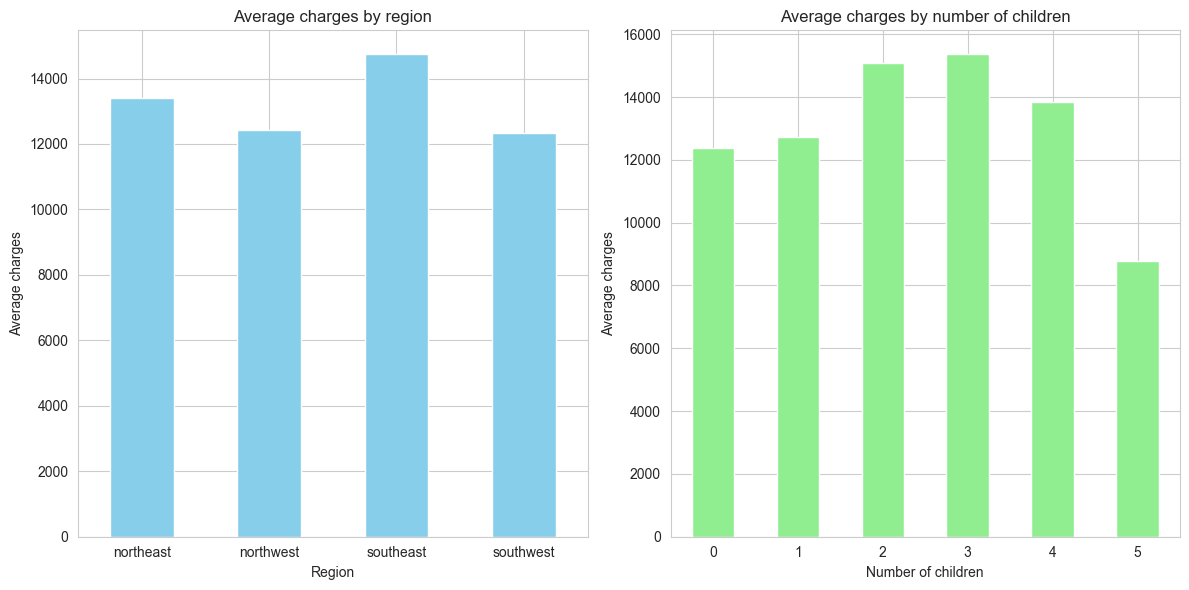

In [9]:
# Calculate average charges by region
avg_charges_by_region = insurance.groupby('region')['charges'].mean()

# Calculate average charges by number of children
avg_charges_by_children = insurance.groupby('children')['charges'].mean()

# Create a single figure for both bar plots
plt.figure(figsize=(12, 6))

# Bar plot for average charges by region
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
avg_charges_by_region.plot(kind='bar', color='skyblue')
plt.title('Average charges by region')
plt.xlabel('Region')
plt.ylabel('Average charges')
plt.xticks(rotation=0)

# Bar plot for average charges by number of children
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
avg_charges_by_children.plot(kind='bar', color='lightgreen')
plt.title('Average charges by number of children')
plt.xlabel('Number of children')
plt.ylabel('Average charges')
plt.xticks(rotation=0)

# Display the plots
plt.tight_layout()
plt.show()

We don't see a huge difference between charges by region, although there is a difference. Number of children doesn't show any pattern (such as the more children you have the higher the charges), with the people having five children paying significantly less. Therefore it would be a good idea to look at the count per number of children:

In [10]:
insurance['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

There are very few people that have 5 children, so there might be other factors skewing the variable.

### Age bracket and BMI category

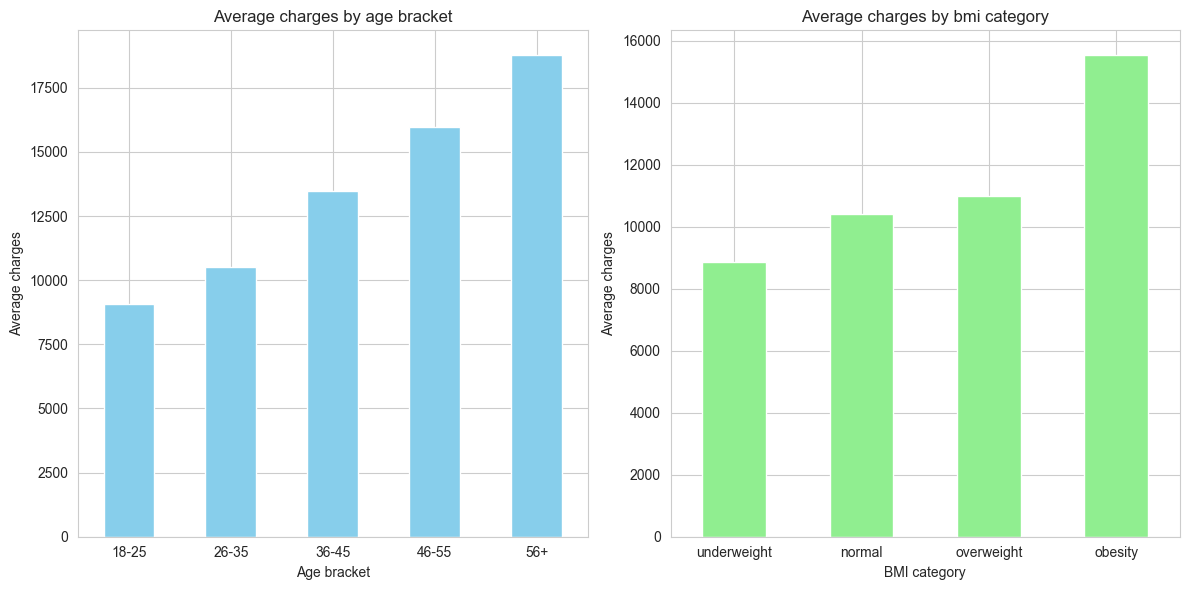

In [11]:
# Calculate average charges by age bracket
avg_charges_by_age = insurance.groupby('age_bracket')['charges'].mean()

# Calculate average charges by bmi category
avg_charges_by_bmi = insurance.groupby('bmi_category')['charges'].mean()
avg_charges_by_bmi = avg_charges_by_bmi[['underweight', 'normal', 'overweight', 'obesity']]

# Create a single figure for both bar plots
plt.figure(figsize=(12, 6))

# Bar plot for average charges by age bracket
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
avg_charges_by_age.plot(kind='bar', color='skyblue')
plt.title('Average charges by age bracket')
plt.xlabel('Age bracket')
plt.ylabel('Average charges')
plt.xticks(rotation=0)

# Bar plot for average charges by bmi category
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
avg_charges_by_bmi.plot(kind='bar', color='lightgreen')
plt.title('Average charges by bmi category')
plt.xlabel('BMI category')
plt.ylabel('Average charges')
plt.xticks(rotation=0)

# Display the plots
plt.tight_layout()
plt.show()

Here he can clearly see the correlation between BMI and age bracket. We Well further look at the correlation between these two variables and charges in the next section.

## Correlation analysis
Here we will look at the correlation between BMI, age, and insurance charges. I will also color by smoker because if the significant difference.

First let's see the correlation between age and charges:

In [12]:
correlation = insurance['age'].corr(insurance['charges'])
print(f"Correlation between age and charges: {correlation:.3f}")
px.scatter(insurance, x='charges', y='age', color='smoker', trendline='ols', hover_data=['bmi', 'sex', 'region'], title='Scatter plot of Charges vs Age colored by Smoker Status')

Correlation between age and charges: 0.299


And the correlation between BMI and charges:

In [13]:
correlation = insurance['bmi'].corr(insurance['charges'])
print(f"Correlation between BMI and charges: {correlation:.3f}")
px.scatter(insurance, x='charges', y='bmi', color='smoker', trendline='ols', hover_data=['age', 'sex', 'region'], title='Scatter plot of Charges vs BMI colored by Smoker Status')

Correlation between BMI and charges: 0.198


Both of them show very week correlation with charges, but this might be due to the fact that we analyzed the correlation of all the data, instead of selecting subsets. For age we can see clearly 3 groupings, one at the left of the graph that contains majority of data and is made up exclusively of non-smokers, and that clearly shows correlation between the age and the charges, However this correlation is disrupted by other two groups, one that has significant number of smokers and the other highest charged one made up exclusively of smokers.

For BMI there might be some correlation between smokers with higher BMI and smokers with lower, However there doesn't seem to be any trend in non-smokers. We can check that again by investigating only the subset where smoker status is yes.

In [14]:
# Check correlation between BMI and charges for smoker=True group
smoker_true = insurance[insurance['smoker'] == True]
correlation = smoker_true['bmi'].corr(smoker_true['charges'])
print(f"Correlation between BMI and charges for smokers: {correlation:.3f}")

# Visualize the relationship for smokers
fig = px.scatter(smoker_true, x='charges', y='bmi', trendline='ols',
                 title='Charges vs BMI for Smokers',
                 hover_data=['age', 'sex', 'region'])
fig.show()

Correlation between BMI and charges for smokers: 0.806


Once we consider exclusively smokers we can clearly see that there is a correlation between BMI and charges within this supgroup.

## Conclusion
We can deduce several conclusions from these findings:
- Smoker status has the greatest influence on the insurance charges
- There is a correlation between BMI and insurance charges, but only in smokers
- There is likely a correlation between age and insurance charges, but other factors are more significant, diminishing its importance.
- When you plot the data of charges vs age, you can clearly see 3 clusters of data, each of which might show a correlation between age and charges individually.

Jeremy added analysis.  I will also test correlation between charges with age and with BMI for male smokers, female smokers, male non smokers and female non-smokers to see if the correlations in each group are stronger than simply grouping by smoker status.  Unclear if this will be the case since there appear to be more male smokers than femaile smokers which may partly explain the slightly higher average charges for males than femailes but we will check below. 

In [37]:
# Check correlation between BMI and charges for male smokers
malesmoker_true = insurance[(insurance['sex'] == 'male') & (insurance['smoker'] == True)]
correlation = malesmoker_true['bmi'].corr(malesmoker_true['charges'])
print(f"Correlation between BMI and charges for malesmokers: {correlation:.3f}")

# Visualize the relationship for male smokers
fig = px.scatter(malesmoker_true, x='charges', y='bmi', trendline='ols',
                 title='Charges vs BMI for Malesmokers',
                 hover_data=['age', 'sex', 'region'])
fig.show()

# Check correlation between BMI and charges for female smokers
femalesmoker_true = insurance[(insurance['sex'] == 'female') & (insurance['smoker'] == True)]
correlation = femalesmoker_true['bmi'].corr(femalesmoker_true['charges'])
print(f"\n Correlation between BMI and charges for femalesmokers: {correlation:.3f}")

# Visualize the relationship for female smokers
fig = px.scatter(femalesmoker_true, x='charges', y='bmi', trendline='ols',
                 title='Charges vs BMI for femalesmokers',
                 hover_data=['age', 'sex', 'region'])
fig.show()

# Check correlation between BMI and charges for male non-smokers
malesmoker_false = insurance[(insurance['sex'] == 'male') & (insurance['smoker'] == False)]
correlation = malesmoker_false['bmi'].corr(malesmoker_false['charges'])
print(f"\n Correlation between BMI and charges for male non-smokers: {correlation:.3f}")

# Visualize the relationship for male non-smokers
fig = px.scatter(malesmoker_false, x='charges', y='bmi', trendline='ols',
                 title='Charges vs BMI for male Non-Smokers',
                 hover_data=['age', 'sex', 'region'])
fig.show()

# Check correlation between BMI and charges for female non-smokers
femalesmoker_false = insurance[(insurance['sex'] == 'female') & (insurance['smoker'] == False)]
correlation = femalesmoker_false['bmi'].corr(femalesmoker_false['charges'])
print(f"\n Correlation between BMI and charges for female non-smokers: {correlation:.3f}")

# Visualize the relationship for female non-smokers
fig = px.scatter(femalesmoker_false, x='charges', y='bmi', trendline='ols',
                 title='Charges vs BMI for female non-Smokers',
                 hover_data=['age', 'sex', 'region'])
fig.show()

Correlation between BMI and charges for malesmokers: 0.769



 Correlation between BMI and charges for femalesmokers: 0.846



 Correlation between BMI and charges for male non-smokers: 0.096



 Correlation between BMI and charges for female non-smokers: 0.075
